<a href="https://colab.research.google.com/github/GustavoCervera/Projects/blob/master/SARIMAX_BITCOIN_FINAL.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Carregar as bibliotecas para serem usadas

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from statsmodels.tsa.statespace.sarimax import SARIMAX

/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


Carregar e transformar DataFrame do Bitcoin

In [ ]:
bitcoin_raw = pd.read_csv("bitcoin_daily.csv")
close_list = ['Date', 'Close']
bitcoin_raw = bitcoin_raw[close_list]
bitcoin_raw["Date"] = pd.to_datetime(bitcoin_raw.Date)
bitcoin_raw = bitcoin_raw.set_index("Date")
bitcoin_raw.head()

,Close
Date,
2017-06-30,2480.840088
2017-07-01,2434.550049
2017-07-02,2506.469971
2017-07-03,2564.060059
2017-07-04,2601.639893


Dividir o DataFrame entre Treino e Teste

In [ ]:
train_step = int(len(bitcoin_raw)*0.95)
train = list(bitcoin_raw[:train_step]["Close"]) # Transformando em lista, para ficar mais fácil de fazer o append futuramente
test = list(bitcoin_raw[train_step:]["Close"])  # Transformando em lista, para ficar mais fácil de fazer o append futuramente

Gerar as previsões dos valores do bitcoin e jogá-las em uma lista chamada 'model_prediction', depois adicionar no conjunto de treino o próximo valor de teste

In [ ]:
model_predictions=[]
for i in range(len(test)):
    model = SARIMAX(train,order=(1,1,0),seasonal_order=(3, 1, 0, 7))
    model_fit = model.fit()
    output = model_fit.forecast()
    yhat=output[0]
    model_predictions.append(yhat)
    actual_test_value=test[i]
    train.append(actual_test_value)

Mostrar informações sobre o modelo treinado

In [ ]:
model_fit.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 Statespace Model Results                                
=========================================================================================
Dep. Variable:                                 y   No. Observations:                 1827
Model:             SARIMAX(1, 1, 0)x(3, 1, 0, 7)   Log Likelihood              -15351.457
Date:                           Thu, 30 Jun 2022   AIC                          30712.915
Time:                                   14:47:35   BIC                          30740.445
Sample:                                        0   HQIC                         30723.072
                                          - 1827                                         
Covariance Type:                             opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.0407      0.014     -2.833      0.005      -0.069      -0.013
ar.S.L7       -0.7971      0.012    -69.008      0.000      -0.820      -0.775
ar.S.L14      -0.5476      0.012    -45.249      0.000      -0.571      -0.524
ar.S.L21      -0.3047      0.012    -25.264      0.000      -0.328      -0.281
sigma2      1.251e+06   1.79e+04     70.060      0.000    1.22e+06    1.29e+06
===================================================================================
Ljung-Box (Q):                      267.78   Jarque-Bera (JB):              6290.94
Prob(Q):                              0.00   Prob(JB):                         0.00
Heteroskedasticity (H):              13.82   Skew:                            -0.19
Prob(H) (two-sided):                  0.00   Kurtosis:                        12.10
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

Plotar os valores previstos vs os valores reais do bitcoin

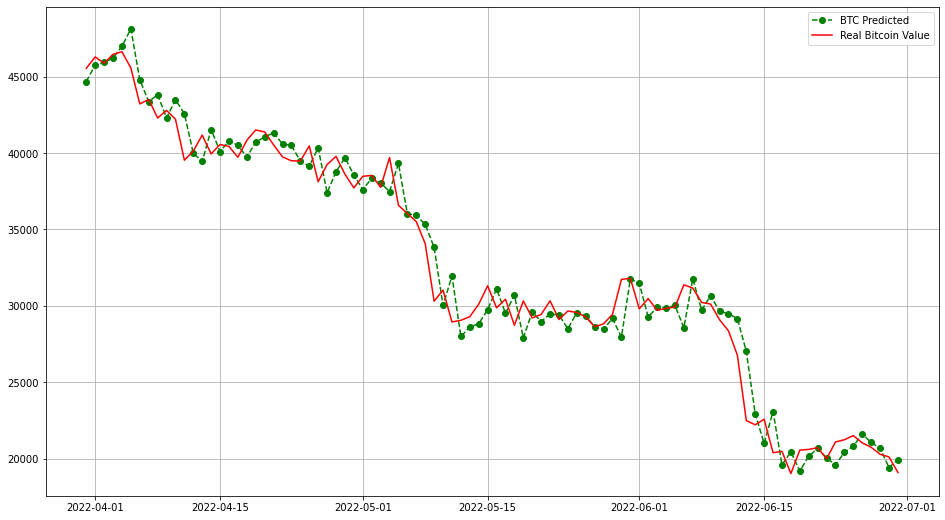

In [ ]:
plt.figure(figsize=(16,9))
plt.grid(True)
plt.plot(bitcoin_raw[train_step:].index, model_predictions, color='green', marker='o', linestyle='dashed', label="BTC Predicted")
plt.plot(bitcoin_raw[train_step:].index, test, color='red', label="Real Bitcoin Value")
plt.legend(loc="upper right")